In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

keras.__version__

'2.8.0'

In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.read_csv("data_boston.csv", header="infer", sep=";")
X = df.drop(columns=["price"])
y = df["price"]

In [ ]:
df.head(5)

crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

    black  lstat  price  
0  396.90   4.98   24.0  
1  396.90   9.14   21.6  
2  392.83   4.03   34.7  
3  394.63   2.94   33.4  
4  396.90   5.33   36.2

In [ ]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
n_vars = X_train.shape[1]
print(n_vars)

13


In [ ]:
my_model = Sequential()
my_model.add(Dense(input_dim = n_vars, units = 1, activation="linear"))
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [ ]:
n_epochs = 2000
batch_size = 10
learn_rate = 0.002

my_model.compile(optimizer="adam", loss="mae", metrics=["mse"])


In [ ]:
my_summary = my_model.fit(X_train, y_train, epochs = n_epochs, batch_size = batch_size, validation_split = 0.2, verbose = 0)

In [ ]:
my_summary.history.keys()

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])

In [ ]:
n_skip = 100
plt.plot(my_summary.history["mse"][n_skip:], c="b")
plt.plot(my_summary.history["val_mse"][n_skip:], c="g")
plt.title("Training History")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()


In [ ]:
y_pred = my_model.predict(X_test)[:,0]
RMSE = np.sqrt(np.mean((y_test - y_pred)**2))
np.round(RMSE,3)


5.689

In [ ]:
MSE = my_model.evaluate(X_test, y_test, verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(RMSE,3))


Test RMSE : 5.688515708690412


OTRA FORMA DE DEFINIR LO MISMO

In [23]:
from keras.models import Model
from keras.layers import Input, Dense


In [24]:
my_input = Input(shape=(n_vars,))
my_output = Dense(units=1, activation="linear")(my_input)


In [25]:
my_model2 = Model(inputs = my_input, outputs = my_output)
my_model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 13)]              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 14        
                                                                 
Total params: 14
Trainable params: 14
Non-trainable params: 0
_________________________________________________________________


In [26]:
my_model2.compile(loss = "mae", optimizer="adam", metrics=["mse"])


In [27]:
my_summary = my_model2.fit(X_train, y_train, epochs = n_epochs, batch_size=batch_size, validation_split=0.2, verbose = 0)


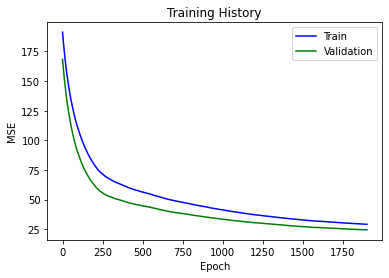

In [28]:
n_skip = 100
plt.plot(my_summary.history["mse"][n_skip:], c="b")
plt.plot(my_summary.history["val_mse"][n_skip:], c="g")
plt.title("Training History")
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.legend(["Train", "Validation"], loc="upper right")
plt.show()

In [29]:
MSE = my_model2.evaluate(X_test, y_test, verbose=0)[1]
RMSE = np.sqrt(MSE)
print("Test RMSE : {}".format(RMSE,3))

Test RMSE : 5.719593090175865
